# Hierarchical Clustering

In this notebook, we'll use hierarchical clustering to see what things work.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from scipy.cluster.hierarchy import linkage, dendrogram

import warnings
warnings.filterwarnings('ignore')

# Setting for full table display
pd.set_option('display.max_columns', None)

In [2]:
# Import data
df = pd.read_csv('data/feature_engineered_data.csv')

# print the first few rows to confirm the data has been loaded correctly
df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,EducationOrdinalEncoded,Relationship_InRelationship,Relationship_NotInRelationship,Relationship_Undefined,ChildrenHome,RegencyInMonths,TotalSpent,DealSeeker,BuyerType_CatalogueBuyer,BuyerType_MixedBuyer,BuyerType_StoreBuyer,BuyerType_WebBuyer,VisitedWebsiteRecently,AcceptedOffer
0,58138,58,635,88,546,172,88,88,3,8,10,4,7,57,2,0,1,0,0,32,1617,1,1,0,0,0,1,1
1,46344,38,11,1,6,2,1,6,2,1,1,2,5,60,2,0,1,0,1,5,27,0,0,0,1,0,1,0
2,71613,26,426,49,127,111,21,42,1,8,2,10,4,49,2,1,0,0,0,16,776,0,0,0,1,0,1,0
3,26646,26,11,4,20,10,3,5,2,2,0,4,6,30,2,1,0,0,1,3,53,0,0,0,1,0,1,0
4,58293,94,173,43,118,46,27,15,5,5,3,6,5,33,5,1,0,0,1,11,422,1,0,0,1,0,1,0


## Standardise

In [3]:
# Scaling of continuous features
continuous_features = ['Income',
                       'Recency',
                       'MntWines',
                       'MntFruits',
                       'MntMeatProducts',
                       'MntFishProducts',
                       'MntSweetProducts',
                       'MntGoldProds',
                       'NumDealsPurchases',
                       'NumWebPurchases',
                       'NumCatalogPurchases',
                       'NumStorePurchases',
                       'NumWebVisitsMonth',
                       'Age',
                       'RegencyInMonths',
                       'TotalSpent']

# Separate binary features
continuous_data = df[continuous_features]
binary_ord_data = df.drop(continuous_features, axis=1)

In [4]:
# Standardize continuous features using RobustScaler
scaler_continuous = RobustScaler()
scaled_continuous_data = scaler_continuous.fit_transform(continuous_data)

# Combined data
final_scaled_data = np.concatenate([scaled_continuous_data, binary_ord_data], axis=1)

In [5]:
final_scaled_data

array([[ 0.20420617,  0.18      ,  0.95991671, ...,  0.        ,
         1.        ,  1.        ],
       [-0.15566049, -0.22      , -0.33940656, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.61536466, -0.46      ,  0.5247267 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.16890299,  0.84      ,  1.52837064, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.54311062, -0.82      ,  0.5288912 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.04343481, -0.18      , -0.18740239, ...,  0.        ,
         1.        ,  1.        ]])

## Hierarchical Clustering

In [6]:
# Implement different linkage method.
complete_clustering = linkage(final_scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(final_scaled_data, method="average", metric="euclidean")
single_clustering = linkage(final_scaled_data, method="single", metric="euclidean")

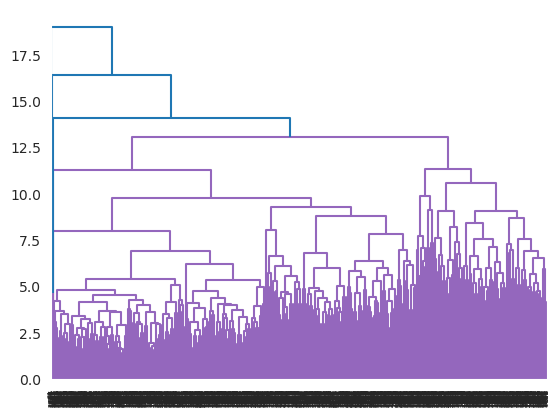

<Figure size 4000x2400 with 0 Axes>

In [10]:
dendrogram(complete_clustering)
plt.figure(figsize=(20, 12))
plt.show()

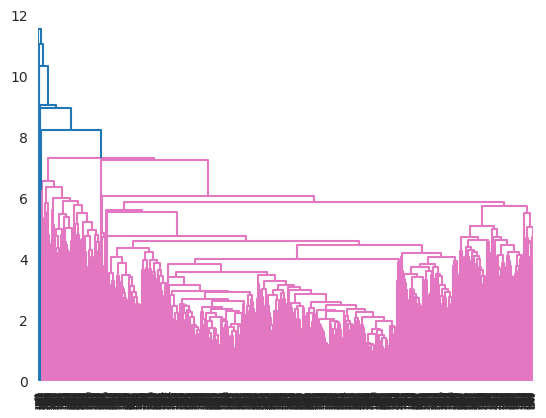

<Figure size 2000x1200 with 0 Axes>

In [8]:
dendrogram(average_clustering)
plt.figure(figsize=(20, 12))
plt.show()

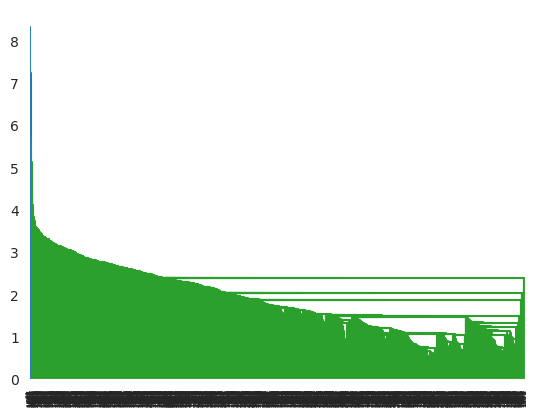

<Figure size 2000x1200 with 0 Axes>

In [9]:
dendrogram(single_clustering)
plt.figure(figsize=(20, 12))
plt.show()

Not getting very good results from this method. Abandoned